In [1]:
# Kutibxonalardi tortib olamiz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv('student_data.csv')

In [3]:
# data bilan tanishib chiqamiz
df.head(10)

,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,165527,Bryan Rogers,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572
1,635763,James Hogan,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760
2,740021,David Robinson,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871
3,433076,Susan Miller,1999-10-30,Computer Science,2021,2019,1,Data Science,134955,17284
4,441628,Brittany Martin,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871
5,837685,Melody Payne,1997-12-15,Mechanical Engineering,2016,2019,4,Web Development,131633,7565
6,268329,Erica Owens,2003-06-20,Mechanical Engineering,2020,2020,1,Artificial Intelligence,52994,5231
7,260971,Timothy Cruz,2003-05-19,Electrical Engineering,2021,2019,2,Artificial Intelligence,125632,18721
8,851589,Cassandra Johnson,1999-09-11,Chemical Engineering,2019,2020,1,Network Security,89571,16943
9,880448,Jonathan Ali,2006-03-31,Mechanical Engineering,2019,2020,4,Artificial Intelligence,61165,5748


In [4]:
# data bilan tanishib chiqamiz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Student ID                   200000 non-null  int64 
 1   Student Name                 200000 non-null  object
 2   Date of Birth                200000 non-null  object
 3   Field of Study               200000 non-null  object
 4   Year of Admission            200000 non-null  int64 
 5   Expected Year of Graduation  200000 non-null  int64 
 6   Current Semester             200000 non-null  int64 
 7   Specialization               200000 non-null  object
 8   Fees                         200000 non-null  int64 
 9   Discount on Fees             200000 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 15.3+ MB


In [5]:
# Data bn tanishmiz
print(df.describe())

          Student ID  Year of Admission  Expected Year of Graduation  \
count  200000.000000      200000.000000                200000.000000   
mean   549367.492925        2018.997685                  2019.995235   
std    259361.565011           2.002381                     1.997744   
min    100001.000000        2016.000000                  2017.000000   
25%    325311.000000        2017.000000                  2018.000000   
50%    548855.500000        2019.000000                  2020.000000   
75%    774182.500000        2021.000000                  2022.000000   
max    999997.000000        2022.000000                  2023.000000   

       Current Semester           Fees  Discount on Fees  
count     200000.000000  200000.000000     200000.000000  
mean           2.499020  125092.847595      12484.258575  
std            1.117804   43287.894903       8788.362629  
min            1.000000   50000.000000          0.000000  
25%            1.000000   87641.500000       5383.000000

In [6]:
# dae of birth object bolganligi uchun uni date time formatga otib olamiz 
df["Date of Birth"]=pd.to_datetime(df["Date of Birth"])

In [7]:
# object formtga otdi

df["Date of Birth"]

0        2006-01-19
1        1999-05-23
2        1997-12-02
3        1999-10-30
4        1998-01-10
            ...    
199995   2001-06-06
199996   2003-12-15
199997   2000-07-27
199998   2001-02-16
199999   2005-10-17
Name: Date of Birth, Length: 200000, dtype: datetime64[ns]

In [8]:
df["Year of Birth"]=df["Date of Birth"].dt.year
df["Month of Birth"]=df["Date of Birth"].dt.month
df["Day of Birth"]=df["Date of Birth"].dt.day
df["Weekday of Birth"]=df["Date of Birth"].dt.weekday

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Student ID                   200000 non-null  int64         
 1   Student Name                 200000 non-null  object        
 2   Date of Birth                200000 non-null  datetime64[ns]
 3   Field of Study               200000 non-null  object        
 4   Year of Admission            200000 non-null  int64         
 5   Expected Year of Graduation  200000 non-null  int64         
 6   Current Semester             200000 non-null  int64         
 7   Specialization               200000 non-null  object        
 8   Fees                         200000 non-null  int64         
 9   Discount on Fees             200000 non-null  int64         
 10  Year of Birth                200000 non-null  int32         
 11  Month of Birth            

In [10]:
# date of  birth endi bizga kerakmas shuning uchun tashab yuborsak boladi
df.drop("Date of Birth",axis=1,inplace=True)

In [11]:
# ntijani tekshirib qoyamiz korib turganizdek "Date of Birth" yoqolgan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Student ID                   200000 non-null  int64 
 1   Student Name                 200000 non-null  object
 2   Field of Study               200000 non-null  object
 3   Year of Admission            200000 non-null  int64 
 4   Expected Year of Graduation  200000 non-null  int64 
 5   Current Semester             200000 non-null  int64 
 6   Specialization               200000 non-null  object
 7   Fees                         200000 non-null  int64 
 8   Discount on Fees             200000 non-null  int64 
 9   Year of Birth                200000 non-null  int32 
 10  Month of Birth               200000 non-null  int32 
 11  Day of Birth                 200000 non-null  int32 
 12  Weekday of Birth             200000 non-null  int32 
dtypes: int32(4), i

In [12]:
# Bizda yana Objectlar bore ekan ularni value counts orali koramiz

df["Field of Study"].value_counts()

Field of Study
Electrical Engineering    40305
Chemical Engineering      40020
Computer Science          39960
Mechanical Engineering    39941
Civil Engineering         39774
Name: count, dtype: int64

In [14]:
# Bizda yana Objectlar bore ekan ularni value counts orali koramiz
df["Specialization"].value_counts()

Specialization
Web Development            40292
Machine Learning           40142
Network Security           39932
Data Science               39870
Artificial Intelligence    39764
Name: count, dtype: int64

In [15]:
# encoding qilamiz

encoder=LabelEncoder()
df["Field of Study"]=encoder.fit_transform(df["Field of Study"])

In [16]:
# encoding qilamiz
df["Specialization"]=encoder.fit_transform(df["Specialization"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Student ID                   200000 non-null  int64 
 1   Student Name                 200000 non-null  object
 2   Field of Study               200000 non-null  int64 
 3   Year of Admission            200000 non-null  int64 
 4   Expected Year of Graduation  200000 non-null  int64 
 5   Current Semester             200000 non-null  int64 
 6   Specialization               200000 non-null  int64 
 7   Fees                         200000 non-null  int64 
 8   Discount on Fees             200000 non-null  int64 
 9   Year of Birth                200000 non-null  int32 
 10  Month of Birth               200000 non-null  int32 
 11  Day of Birth                 200000 non-null  int32 
 12  Weekday of Birth             200000 non-null  int32 
dtypes: int32(4), i

In [18]:
# bizga "studnet Id" bn "Studnet Name" keraksiz data bolgani uchun tashab yuborishga qaror qildik

df.drop(columns=["Student ID","Student Name"],inplace=True)

In [19]:
# Yoqoldimikan tomikan korib qoyamiz

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Field of Study               200000 non-null  int64
 1   Year of Admission            200000 non-null  int64
 2   Expected Year of Graduation  200000 non-null  int64
 3   Current Semester             200000 non-null  int64
 4   Specialization               200000 non-null  int64
 5   Fees                         200000 non-null  int64
 6   Discount on Fees             200000 non-null  int64
 7   Year of Birth                200000 non-null  int32
 8   Month of Birth               200000 non-null  int32
 9   Day of Birth                 200000 non-null  int32
 10  Weekday of Birth             200000 non-null  int32
dtypes: int32(4), int64(7)
memory usage: 13.7 MB


In [20]:
# Null qiymatlarni tekshib olamiz

df.isnull().sum()

Field of Study                 0
Year of Admission              0
Expected Year of Graduation    0
Current Semester               0
Specialization                 0
Fees                           0
Discount on Fees               0
Year of Birth                  0
Month of Birth                 0
Day of Birth                   0
Weekday of Birth               0
dtype: int64

In [21]:
# Target variablni "Field of Study" deb oldik
x = df.drop('Field of Study', axis=1)  
y = df['Field of Study']

In [22]:
x.head(1)

,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees,Year of Birth,Month of Birth,Day of Birth,Weekday of Birth
0,2020,2017,3,4,155152,19572,2006,1,19,3


In [23]:
y.head(1)

0    2
Name: Field of Study, dtype: int64

In [25]:
# Step 1: Split into 70% training and 30% temp
x_train, x_temp, y_train, y_temp = train_test_split(x,y,test_size=0.3, random_state=42)

# Step 2: Split the temp set into 50% validation and 50% test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [26]:
#Tekshirib olamiz

len(x_train)

140000

In [27]:
len(x_val)

30000

In [28]:
#Model aniqlab olamiz
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# modelni moslashtirib olamiz

# Step 4: Evaluate the model on the validation set
y_val_pred = dt_model.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

In [32]:
# accuracy ni tekshiramiz

val_accuracy

0.1992

In [33]:
# Modelni improve qilish uchun datani tayyorlaymiz

y_test_pred = dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [34]:
# Modelni improve qilish uchun datani tayyorlaymiz

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.2036


In [36]:
#Scaler qilb olamiz

scaler_x=StandardScaler()

In [37]:
# Modelni improve qilish uchun datani tayyorlaymiz va scaler qilb olamiz

x_train_scaled=scaler_x.fit_transform(x_train)
x_test_scaled=scaler_x.transform(x_test)

In [38]:
#Modelni anqlaymiz

model=DecisionTreeClassifier(random_state=42)
model.fit(x_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
# Modelni improve qilish uchun datani tayyorlaymiz prdict bilan

y_pred_scaled=model.predict(x_test_scaled)

In [40]:
# Modelni improve qilish uchun datani tayyorlaymiz prdict bilan

test_accuracy = accuracy_score(y_test, y_pred_scaled)

In [41]:
#songi natijani tekshiramiz

test_accuracy 

0.2033

In [42]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
y_val_pred= clf.predict(x_val)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))

Accuracy: 0.2033


In [49]:
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))


Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.21      0.21      6058
           1       0.20      0.20      0.20      5879
           2       0.21      0.21      0.21      6005
           3       0.21      0.20      0.21      6103
           4       0.20      0.20      0.20      5955

    accuracy                           0.20     30000
   macro avg       0.20      0.20      0.20     30000
weighted avg       0.20      0.20      0.20     30000



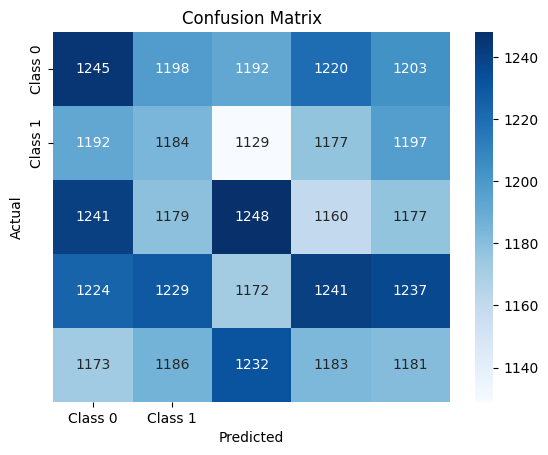

In [51]:
cm = confusion_matrix(y_test, y_pred_scaled)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [55]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [56]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.20385


In [57]:
x_train_subset = x_train.sample(n=1000, random_state=42)  
y_train_subset = y_train.loc[x_train_subset.index]

In [58]:
grid_search.fit(x_train_subset, y_train_subset)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [59]:
test_accuracy = grid_search.best_estimator_.score(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.1976


In [60]:
df['Age'] = 2024 - df['Year of Birth']

In [61]:
df['Fee Discount Percentage'] = (df['Discount on Fees'] / df['Fees']) * 100

In [62]:
df['Age at Admission'] = df['Year of Admission'] - df['Year of Birth']


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Field of Study               200000 non-null  int64  
 1   Year of Admission            200000 non-null  int64  
 2   Expected Year of Graduation  200000 non-null  int64  
 3   Current Semester             200000 non-null  int64  
 4   Specialization               200000 non-null  int64  
 5   Fees                         200000 non-null  int64  
 6   Discount on Fees             200000 non-null  int64  
 7   Year of Birth                200000 non-null  int32  
 8   Month of Birth               200000 non-null  int32  
 9   Day of Birth                 200000 non-null  int32  
 10  Weekday of Birth             200000 non-null  int32  
 11  Age                          200000 non-null  int32  
 12  Fee Discount Percentage      200000 non-null  float64
 13 

In [66]:
df['Fee Discount Percentage'] = df['Fee Discount Percentage'].astype(int)


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Field of Study               200000 non-null  int64
 1   Year of Admission            200000 non-null  int64
 2   Expected Year of Graduation  200000 non-null  int64
 3   Current Semester             200000 non-null  int64
 4   Specialization               200000 non-null  int64
 5   Fees                         200000 non-null  int64
 6   Discount on Fees             200000 non-null  int64
 7   Year of Birth                200000 non-null  int32
 8   Month of Birth               200000 non-null  int32
 9   Day of Birth                 200000 non-null  int32
 10  Weekday of Birth             200000 non-null  int32
 11  Age                          200000 non-null  int32
 12  Fee Discount Percentage      200000 non-null  int64
 13  Age at Admission             

In [69]:
x=df.drop(columns=['Field of Study'])
y=df['Field of Study']

In [70]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y,test_size=0.2, random_state=42)


In [71]:
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [72]:
x_train_scaled=scaler_x.fit_transform(x_train)
x_test_scaled=scaler_x.transform(x_test)
x_val_scaled=scaler_x.transform(x_val)

In [73]:
clf = DecisionTreeClassifier(random_state=42)

In [74]:
clf.fit(x_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [75]:
y_val_pred= clf.predict(x_val)
print("Accuracy:", accuracy_score(y_val, y_val_pred))

Accuracy: 0.20095


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# Random Forest classifier

In [76]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [77]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy'],
}


In [78]:
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)


In [79]:
grid_search_rf.fit(x_train_subset, y_train_subset)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [80]:
train_accuracy_rf = grid_search_rf.best_estimator_.score(x_train_subset, y_train_subset)
print(f"Random Forest training accuracy: {train_accuracy_rf:.4f}")

Random Forest training accuracy: 0.5520


In [81]:
missing_cols = set(x_train_subset.columns) - set(x_test.columns)
for col in missing_cols:
    x_test[col] = 0  
x_test = x_test[x_train_subset.columns]


In [82]:
test_accuracy_rf = grid_search_rf.best_estimator_.score(x_test, y_test)
print(f"Random Forest test accuracy: {test_accuracy_rf:.4f}")

Random Forest test accuracy: 0.2037


# knn model

In [83]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

In [84]:
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)

In [85]:
grid_search_knn.fit(x_train_subset, y_train_subset)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [86]:
print(f"Best Hyperparameters for KNN: {grid_search_knn.best_params_}")


Best Hyperparameters for KNN: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


In [87]:
train_accuracy_knn = grid_search_knn.best_estimator_.score(x_train_subset, y_train_subset)
print(f"KNN Training Accuracy: {train_accuracy_knn:.4f}")

KNN Training Accuracy: 1.0000


In [88]:
test_accuracy_knn = grid_search_knn.best_estimator_.score(x_test, y_test)
print(f"KNN Test Accuracy: {test_accuracy_knn:.4f}")

KNN Test Accuracy: 0.2026


# Logistic Regression

In [90]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)

# Hyperparameter Grid
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['lbfgs'], 
}

In [91]:
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=5, n_jobs=-1, verbose=2)
grid_search_logreg.fit(x_train_subset, y_train_subset)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs']},
             verbose=2)

In [92]:
print(f"Best Hyperparameters for Logistic Regression: {grid_search_logreg.best_params_}")

Best Hyperparameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}


In [93]:
train_accuracy_logreg = grid_search_logreg.best_estimator_.score(x_train_subset, y_train_subset)
print(f"Logistic Regression Training Accuracy: {train_accuracy_logreg:.4f}")

Logistic Regression Training Accuracy: 0.2470


In [94]:
test_accuracy_logreg = grid_search_logreg.best_estimator_.score(x_test, y_test)
print(f"Logistic Regression Test Accuracy: {test_accuracy_logreg:.4f}")

Logistic Regression Test Accuracy: 0.1953


In [95]:
from collections import Counter
print(Counter(y_train))

Counter({3: 32248, 2: 32027, 4: 32014, 0: 31856, 1: 31855})


In [96]:
x_train_subset, _, y_train_subset, _ = train_test_split(x_train, y_train, test_size=0.8, random_state=42)

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_aligned = x_test.reindex(columns=x_train.columns, fill_value=0)
x_test_scaled = scaler.transform(x_test_aligned)


In [103]:
print("Columns in training data:", x_train_subset.columns)
print("Columns in test data:", x_test.columns)

Columns in training data: Index(['Year of Admission', 'Expected Year of Graduation', 'Current Semester',
       'Specialization', 'Fees', 'Discount on Fees', 'Year of Birth',
       'Month of Birth', 'Day of Birth', 'Weekday of Birth', 'Age',
       'Fee Discount Percentage', 'Age at Admission',
       'cFee Discount Percentage'],
      dtype='object')
Columns in test data: Index(['Year of Admission', 'Expected Year of Graduation', 'Current Semester',
       'Specialization', 'Fees', 'Discount on Fees', 'Year of Birth',
       'Month of Birth', 'Day of Birth', 'Weekday of Birth'],
      dtype='object')


In [105]:
scaler = StandardScaler()
x_train_subset_scaled = scaler.fit_transform(x_train_subset)


x_val_scaled = scaler.transform(x_val)


x_test_aligned = x_test.reindex(columns=x_train_subset.columns, fill_value=0)


x_test_scaled = scaler.transform(x_test_aligned)

print("Scaling applied successfully!")


Scaling applied successfully!


In [108]:

scaler = StandardScaler()
x_train_subset_scaled = scaler.fit_transform(x_train_subset)
x_val_scaled =scaler.transform(x_val)

In [113]:
print("Feature names seen during fit:", scaler.feature_names_in_)
print("Test data feature names:", x_test.columns.tolist())


Feature names seen during fit: ['Year of Admission' 'Expected Year of Graduation' 'Current Semester'
 'Specialization' 'Fees' 'Discount on Fees' 'Year of Birth'
 'Month of Birth' 'Day of Birth' 'Weekday of Birth' 'Age'
 'Fee Discount Percentage' 'Age at Admission' 'cFee Discount Percentage']
Test data feature names: ['Year of Admission', 'Expected Year of Graduation', 'Current Semester', 'Specialization', 'Fees', 'Discount on Fees', 'Year of Birth', 'Month of Birth', 'Day of Birth', 'Weekday of Birth']


In [118]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier())
], voting='hard')
model.fit(x_train, y_train)


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [120]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Field of Study               200000 non-null  int64
 1   Year of Admission            200000 non-null  int64
 2   Expected Year of Graduation  200000 non-null  int64
 3   Current Semester             200000 non-null  int64
 4   Specialization               200000 non-null  int64
 5   Fees                         200000 non-null  int64
 6   Discount on Fees             200000 non-null  int64
 7   Year of Birth                200000 non-null  int32
 8   Month of Birth               200000 non-null  int32
 9   Day of Birth                 200000 non-null  int32
 10  Weekday of Birth             200000 non-null  int32
 11  Age                          200000 non-null  int32
 12  Fee Discount Percentage      200000 non-null  int64
 13  Age at Admission             

In [128]:
df.rename(columns={'cFee Discount Percentage': 'Fee Discount Percentage'}, inplace=True)


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Field of Study               200000 non-null  int64
 1   Year of Admission            200000 non-null  int64
 2   Expected Year of Graduation  200000 non-null  int64
 3   Current Semester             200000 non-null  int64
 4   Specialization               200000 non-null  int64
 5   Fees                         200000 non-null  int64
 6   Discount on Fees             200000 non-null  int64
 7   Year of Birth                200000 non-null  int32
 8   Month of Birth               200000 non-null  int32
 9   Day of Birth                 200000 non-null  int32
 10  Weekday of Birth             200000 non-null  int32
 11  Age                          200000 non-null  int32
 12  Fee Discount Percentage      200000 non-null  int64
 13  Age at Admission             

In [141]:
print("Columns in X_train:", x_train.columns)
print("Columns in x_test:", x_test.columns)


Columns in X_train: Index(['Year of Admission', 'Expected Year of Graduation', 'Current Semester',
       'Specialization', 'Fees', 'Discount on Fees', 'Year of Birth',
       'Month of Birth', 'Day of Birth', 'Weekday of Birth', 'Age',
       'Fee Discount Percentage', 'Age at Admission',
       'cFee Discount Percentage'],
      dtype='object')
Columns in x_test: Index(['Year of Admission', 'Expected Year of Graduation', 'Current Semester',
       'Specialization', 'Fees', 'Discount on Fees', 'Year of Birth',
       'Month of Birth', 'Day of Birth', 'Weekday of Birth'],
      dtype='object')


In [142]:

missing_columns = ['Age', 'Fee Discount Percentage', 'Age at Admission', 'cFee Discount Percentage']
for col in missing_columns:
    if col not in x_test.columns:
        x_test[col] = 0  # You can use NaN if needed


In [145]:

x_test_aligned = x_test[ x_train.columns]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)


x_test_scaled = scaler.transform(x_test_aligned)


In [148]:

y_pred = model.predict(x_test_scaled)

from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.2019


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [149]:
model = LogisticRegression(solver='saga', max_iter=500)
model.fit(x_train, y_train)


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, solver='saga')

In [150]:
train_accuracy = model.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.2026


In [155]:
!pip install xgboost

import xgboost as xgb

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 2.0 MB/s eta 0:01:02
   ---------------------------------------- 1.0/124.9 MB 2.1 MB/s eta 0:01:00
    --------------------------------------- 1.6/124.9 MB 2.2 MB/s eta 0:00:57
    --------------------------------------- 2.1/124.9 MB 2.2 MB/s eta 0:00:55
    --------------------------------------- 2.6/124.9 MB 2.3 MB/s eta 0:00:54
   - -------------------------------------- 3.1/124.9 MB 2.3 MB/s eta 0:00:53
   - -------------------------------------- 3.7/124.9 MB 2.3 MB/s eta 0:00:53
   - -------------------------------------- 3.9/124.9 MB 2.3 MB/s eta 0:00:53
   - -------------------------------------- 4.5/124.9 MB 2.3 MB/s eta 0:00:53
   - -------------------------------------- 5.0/124.9 MB 2.3 MB/s eta 0:00:54
   - -------------------------------------- 5.2/124.9 MB 2.3 MB/s eta 0:00:53



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [156]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)


In [157]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

In [158]:
xgb_model.fit(X_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:53:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [159]:
y_pred = xgb_model.predict(X_val)

In [162]:
accuracy = accuracy_score(y_val, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")

XGBoost Accuracy: 0.1992


In [172]:
!pip install lightgbm

import lightgbm as lgb


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.4 MB 2.1 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.1 MB/s eta 0:00:00
